In [1]:
from classy import Class

import os
import copy
import yaml
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

from matplotlib import rc
from scipy.interpolate import interp1d

rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
#matplotlib.rc('font', **font)
matplotlib.rcParams['legend.fontsize']='large'
plt.rcParams["figure.figsize"] = [8.0,6.0]

## warmup
run a fiducial cosmology 

In [2]:
LCDM =  Class()
baseline = {'omega_b':0.02309,
            'omega_cdm':0.1305,
            'H0':71.49,
            'A_s':2.152e-09,
            'n_s':0.9925,
            'tau_reio':0.0561, 
            'lensing':'yes',
            'background_verbose': 10,
            'output': 'tCl,pCl,lCl',
            'input_verbose': 10,
            'output_verbose': 10,
            'background_verbose':1
            }
LCDM.set(baseline)

True

Try ADE now

In [3]:
# pheno_axion should work
# pheno_axion_p is a different parametrisation implemented by myself 
# and has no particular reason to work
# for i am a failure 

axion_zc = 10**3.677 
w_n = 0.76
n = (1+w_n)/(1-w_n)
axion_ac = 1/(axion_zc + 1)

ADE_common_dict={
    'fluid_equation_of_state': 'EDE',
    'ede_parametrization':'pheno_axion',
    'fraction_fld_ac': 0.09,
    'w_fld_f': w_n,
    'a_c': axion_ac,
    'Theta_initial_fld': 0.1,
}

models = {'ADE1': Class(), 'ADE2': Class()}

for name, model in models.items():
    model.set(baseline)
    model.set(ADE_common_dict)

ADE1 = models['ADE1']
ADE2 = models['ADE2']
ADE1.set({'nu_fld': 1})
ADE2.set({'nu_fld': 0.5})


#ADE1.set({'ede_parametrization': 'pheno_axion_p',})
#ADE2.set({'ede_parametrization': 'pheno_axion',})

True

In [4]:
#LCDM.compute()
ADE1.compute()
ADE2.compute()

#ADE1.get_background()
#ADE2.get_background()

Reading input parameters
Reading input parameters
Reading in EDE pheno_axion / ADE parameters: 
Read in a_c = 2.103336e-04
Value input for nu_fld = 1.000000
Assuming default n > 500.000000 makes n = infinity
Read in w_fld_f = 7.600000e-01 
	and set n_pheno_axion = 7.333333e+00
 -> matched budget equations by adjusting Omega_Lambda = 0.699399
Running CLASS version v3.3.0
Computing background
pba->Omega0_fld 5.638054e-10  exp(integral_fld) 2.600413e+19
pba->Omega0_ur 3.345073e-05  exp(integral_fld) 0.000000e+00
 -> age = 13.174958 Gyr
 -> conformal age = 13594.259048 Mpc
 -> H0 = 71.490000 km/s/Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 2484.064262
    corresponding to conformal time = 141.294998 Mpc
Reading input parameters
Reading input parameters
Reading in EDE pheno_axion / ADE parameters: 
Read in a_c = 2.103336e-04
Value input for nu_fld = 0.500000
Assuming default n > 500.000000 makes n = infinity


Reading input parameters
Reading input parameters
 -> matched budget equations by adjusting Omega_Lambda = 0.699399
Running CLASS version v3.3.0
Computing background
 -> age = 13.174971 Gyr
 -> conformal age = 13600.502291 Mpc
 -> H0 = 71.490000 km/s/Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3671.129988
    corresponding to conformal time = 104.576600 Mpc


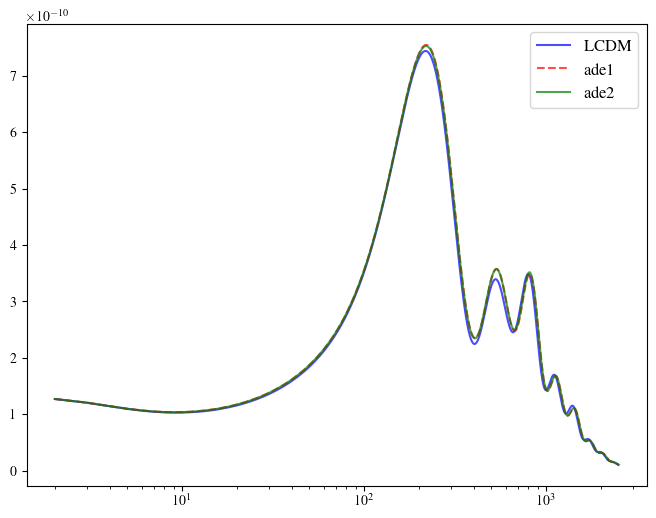

In [5]:
cls_l = LCDM.lensed_cl(2500)
cls1 = ADE1.lensed_cl(2500)
cls2 = ADE2.lensed_cl(2500)
cls_all = [cls_l, cls1, cls2]
colors = ['blue', 'red', 'green']
labels = ['LCDM', 'ade1', 'ade2']
for i in range(3):
    cls = cls_all[i]
    ll = cls['ell'][2:]
    clTT = cls['tt'][2:]
    clEE = cls['ee'][2:]
    clPP = cls['pp'][2:]
    pi = np.pi
    plt.plot(ll,clTT*ll*(ll+1)/2./pi, color=colors[i], linestyle='dashed' if i==1 else 'solid',alpha=0.7, label = labels[i])
    plt.xscale('log')
plt.legend()


In [6]:
bg = ADE1.get_background()
print(bg.keys())
bg_no_p = ADE2.get_background()
derived = LCDM.get_current_derived_parameters(['z_eq','z_rec'])
print (derived.keys())

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_fld', '(.)Omega_fld', '(.)w_fld', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])
dict_keys(['z_eq', 'z_rec'])


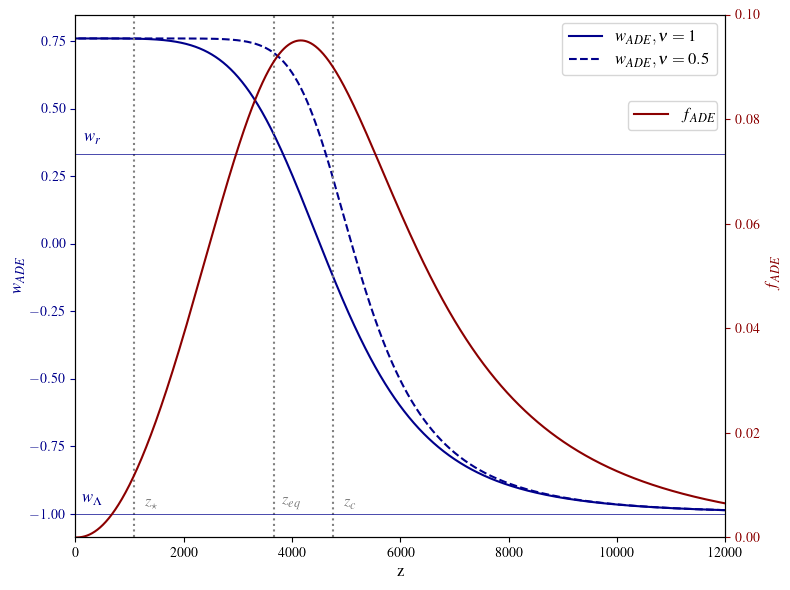

In [9]:

# Prepare the data
z = bg['z']
z_eq = derived['z_eq']
z_rec = derived['z_rec']
w_fld_ADE1 = bg['(.)w_fld']
w_fld_ADE2 = bg_no_p['(.)w_fld']
rho_fld_ADE1 = bg['(.)rho_fld']
rho_tot_ADE1 = bg['(.)rho_tot']
f_fld_1 = rho_fld_ADE1 / rho_tot_ADE1  # This will go on the right-hand y-axis

fig, ax1 = plt.subplots()

# Plot on primary y-axis (left)
ax1.plot(z, w_fld_ADE1, label=r'$w_{ADE}, \nu = 1$', color='darkblue',)
ax1.plot(z, w_fld_ADE2, label=r'$w_{ADE}, \nu = 0.5$', color='darkblue', linestyle='dashed')
ax1.axvline(x=axion_zc, color='grey', linestyle='dotted',)
ax1.axvline(x=z_rec, color='grey', linestyle='dotted',)
ax1.axvline(x=z_eq, color='grey', linestyle='dotted',)
ax1.axhline(y=-1, color='darkblue',linewidth='0.5')
ax1.axhline(y=1/3, color='darkblue',linewidth='0.5')
plt.text(plt.ylim()[0]+300, -0.97, r'$w_\Lambda$', color='darkblue', ha='center', va='bottom',fontsize='large')
plt.text(plt.ylim()[0]+300, 1/3+.03, r'$w_r$', color='darkblue', ha='center', va='bottom',fontsize='large')
plt.text(axion_zc+300, plt.ylim()[0]+.1, r'$z_c$', color='grey', ha='center', va='bottom',fontsize='large')
plt.text(z_rec+300, plt.ylim()[0]+.1, r'$z_{\star}$', color='grey', ha='center', va='bottom',fontsize='large')
plt.text(z_eq+300, plt.ylim()[0]+.1, r'$z_{eq}$', color='grey', ha='center', va='bottom',fontsize='large')

ax1.set_xlabel('z',fontsize='large')
ax1.set_ylabel(r'$w_{ADE}$',fontsize='large', color='darkblue')
ax1.set_xlim(0, 12000)
#ax1.set_ylim(-1.25, .9)
ax1.tick_params('y',colors='darkblue')
# Secondary y-axis (right)
ax2 = ax1.twinx()
ax2.plot(z, f_fld_1, label=r'$f_{ADE}$', color='darkred')
ax2.set_ylabel(r'$f_{ADE}$',fontsize='large',color='darkred')
ax2.set_ylim(0, .1)  # Set based on physical expectations
ax2.tick_params(colors='darkred')

# Merge legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(lines2, labels2, loc='upper right', bbox_to_anchor=(1, 0.85))

plt.tight_layout()
plt.show()
